**Индивидуальное задание**

1. За набор ресурсов был взял iris.data из лабораторной работы

2.1. Описание набора данных, пояснения, позволяющие лучше понять природу данных. Назначение набора данных и возможные модели, которые можно построить на основе данного набора данных (практические задачи, решаемые с использованием данного обучающего набора данных). Описание каждого признака и его тип.

2.2. Форма набора данных: количество элементов набора, количество признаков, количество пропущенных значений, среднее значение отдельных признаков, максимальные и минимальные значения отдельных признаков и прочие показатели. Предположения, которые можно сделать, проведя первичный анализ.

2.3. Графические представления, позволяющие судить о неоднородности исследуемого набора данных. Построение графиков желательно произвести по нескольким проекциям.

2.1. Описание набора данных Iris:
Назначение: Классический набор данных для задач классификации цветков ириса

Признаки:
1. sepal_length - длина чашелистника (см)
2. sepal_width - ширина чашелистника (см)
3. petal_length - длина лепестка (см)
4. petal_width - ширина лепестка (см)
5. class - вид ириса (3 класса)

2.2. Форма набора данных:
Количество элементов: 150
Количество признаков: 4

Описательная статистика:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

Пропущенные значения:
sepal_length    0
sep

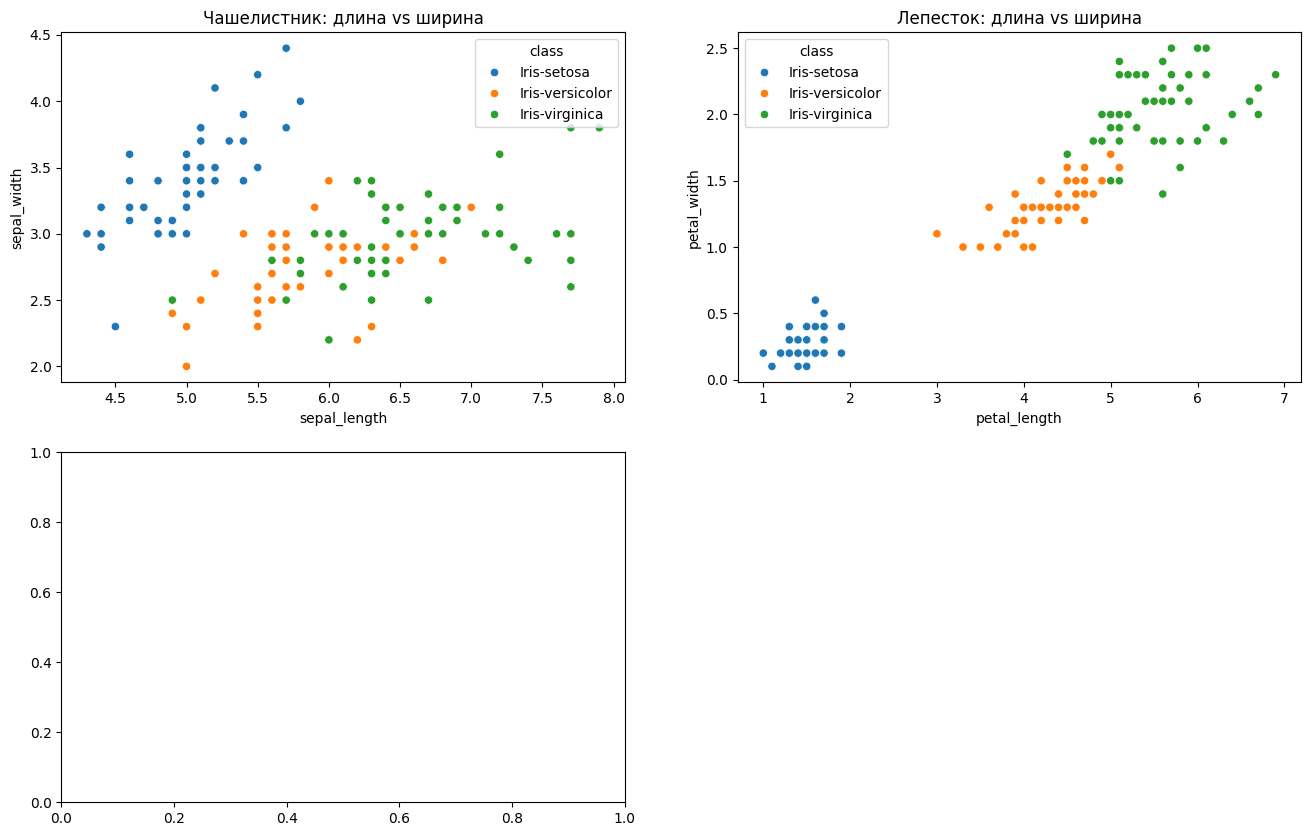

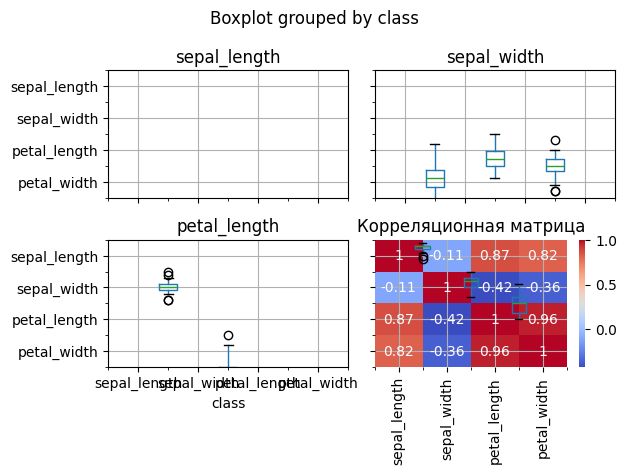

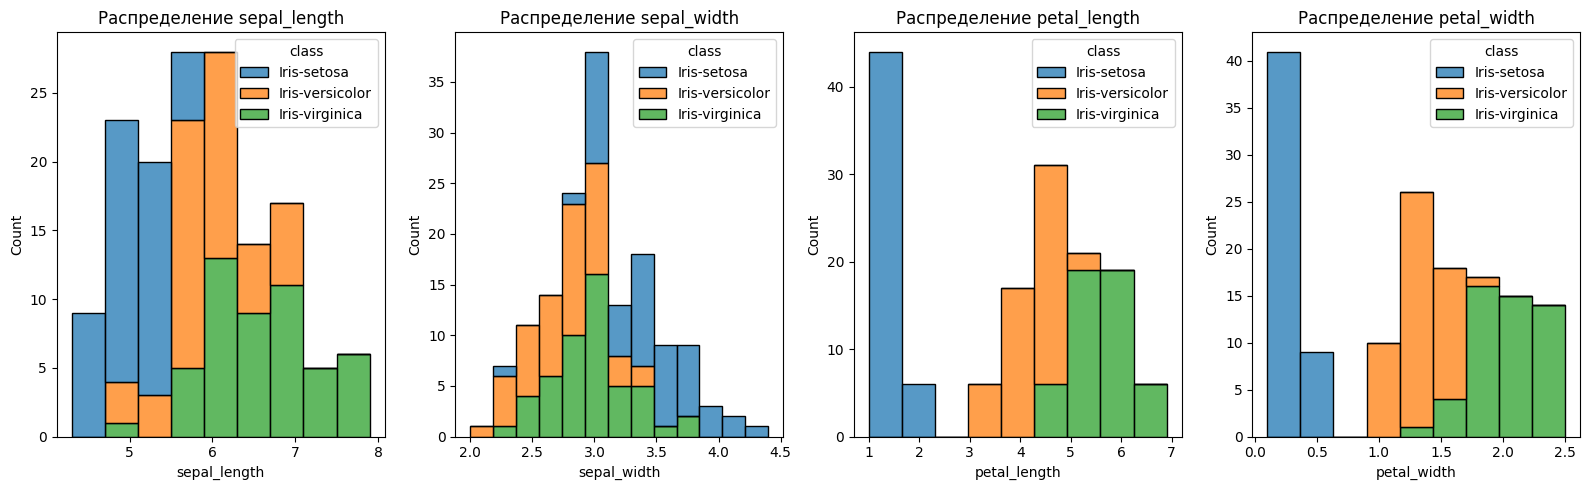

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Загрузка данных
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris = pd.read_csv('./iris.data', header=None, names=columns)

# 2.1. Описание набора данных
print("2.1. Описание набора данных Iris:")
print("Назначение: Классический набор данных для задач классификации цветков ириса")
print("\nПризнаки:")
print("1. sepal_length - длина чашелистника (см)")
print("2. sepal_width - ширина чашелистника (см)")
print("3. petal_length - длина лепестка (см)")
print("4. petal_width - ширина лепестка (см)")
print("5. class - вид ириса (3 класса)")

# 2.2. Форма набора данных
print("\n2.2. Форма набора данных:")
print("Количество элементов:", len(iris))
print("Количество признаков:", len(iris.columns)-1)
print("\nОписательная статистика:")
print(iris.describe())

# Проверка пропусков
print("\nПропущенные значения:")
print(iris.isnull().sum())

# 2.3. Графические представления
plt.figure(figsize=(16,10))

# Матрица scatter plots
plt.subplot(2,2,1)
sns.scatterplot(data=iris, x='sepal_length', y='sepal_width', hue='class')
plt.title('Чашелистник: длина vs ширина')

plt.subplot(2,2,2)
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='class')
plt.title('Лепесток: длина vs ширина')

# Распределение признаков
plt.subplot(2,2,3)
iris.boxplot(column=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], by='class')
plt.title('Распределение признаков по классам')

# Корреляционная матрица
plt.subplot(2,2,4)
correlation = iris.iloc[:, :-1].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')

plt.tight_layout()
plt.show()

# Дополнительный график распределения
plt.figure(figsize=(16,5))
for i, feature in enumerate(['sepal_length', 'sepal_width', 'petal_length', 'petal_width']):
    plt.subplot(1,4,i+1)
    sns.histplot(data=iris, x=feature, hue='class', multiple='stack')
    plt.title(f'Распределение {feature}')
plt.tight_layout()
plt.show()

**Вывод по графикам:**

Scatter plot чашелистника (длина vs ширина):

Значительное перекрытие классов
Невысокая информативность для разделения классов
Существует некоторое линейное разделение, но не очень четкое


Scatter plot лепестка (длина vs ширина):

Почти идеальное разделение классов
Один класс (likely Iris Setosa) компактно расположен в левом нижнем углу
Два других класса имеют бóльшую дисперсию и частичное перекрытие


Boxplot распределения признаков:

Длина лепестка наиболее информативный признак для классификации
Setosa имеет наименьшие значения длины и ширины лепестка
Virginica и Versicolor имеют бóльшие значения и перекрываются


Корреляционная матрица:

Сильная положительная корреляция между шириной и длиной лепестка (0.96)
Умеренная корреляция между признаками лепестков
Чашелистники менее коррелированы


Распределение признаков:

Лепестки (особенно длина) имеют четкую дискриминативную способность
Чашелистники менее информативны для классификации